In [1]:
from pprint import pprint
from collections import Counter, defaultdict

from matplotlib import pyplot

from brickmapper import Mapper
from brickmapper.bedes_parser.bedes_parser import BedesParser
from brickmapper.buildingsync.buildingsync_parser import BuildingSyncParser


In [2]:
"""Get BEDES defns"""
bedes = BedesParser('v2.5')
bedes_defns = bedes._get_term_definitions()

# bedes_defns

In [3]:
"""Get BuildingSync defns"""
buildingsync_parser = BuildingSyncParser()
buildingsync_defns = buildingsync_parser._get_term_definitions()

# buildingsync_defns

In [4]:
"""Create Mapper"""
mapper = Mapper(
    first_definitions=bedes_defns,
    first_index_file="./indices/bedes.ollama.index",
    second_definitions=buildingsync_defns,
    second_index_file="./indices/buidingsync.ollama.index"
)


2025-01-16 12:34:43.575 | INFO     | brickmapper:populate_external_embeddings:48 - Restoring ./indices/bedes.ollama.index...
2025-01-16 12:34:43.579 | INFO     | brickmapper:populate_external_embeddings:48 - Restoring ./indices/buidingsync.ollama.index...


In [5]:
"""Get Mappings"""
top_k = 3
threshold = .3
results = mapper.get_mappings_with_collisions(top_k, threshold)

# results

the threshold was a distance of 0.3:
	 172 defintitons had 0 results below threshold
	 90 defintitons had 1 results below threshold
	 314 defintitons had 3 results below threshold
	 83 defintitons had 2 results below threshold


here are some of the defintions with no matches:
['Assessment Compliance Target Date',
 'Assessment Program URL',
 'Class Height',
 'Construction Status',
 'Distance To Freeway']


here's a histogram of score, groups by the rank of the match


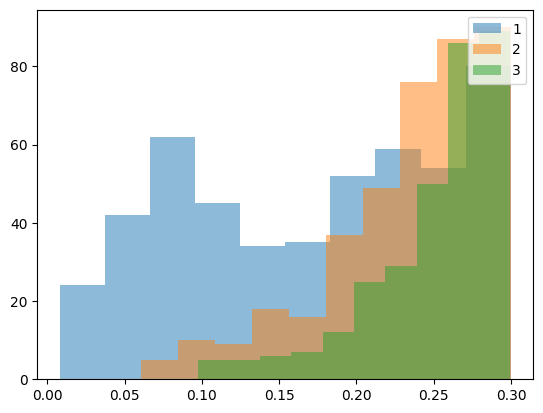

In [6]:
"""Some quick analysis"""

number_of_suggestions_above_threshold = [len(r) for r in results.values()]
print(f"the threshold was a distance of {threshold}:")
for num_results, num_with_num_results in Counter(number_of_suggestions_above_threshold).items():
    print(f"\t {num_with_num_results} defintitons had {num_results} results below threshold")

print("\n\nhere are some of the defintions with no matches:")
pprint([name for name, r in results.items() if len(r) == 0][:5])

scores_by_rank = defaultdict(list)
for r in results.values():
    for rank, (_, score) in enumerate(r):
        scores_by_rank[rank].append(score)

print("\n\nhere's a histogram of score, groups by the rank of the match")
for rank in range(top_k):
    pyplot.hist(scores_by_rank[rank], alpha=0.5, label=rank+1)
    
pyplot.legend(loc='upper right')
pyplot.show()



In [7]:
for rank in range(top_k):
    results_with_rank = [r for r in results.items() if len(r[1]) > rank]
    best_matches = sorted(results_with_rank, key=lambda x: -1 * x[1][rank][1])
    print(f"Some of the best matches for rank {rank + 1} are:")
    pprint([(m[0], m[1][rank]) for m in best_matches[:5]])
    print("\n")


Some of the best matches for rank 1 are:
[('Boiler Blowdown Rate', ('Boiler', np.float32(0.29980808))),
 ('Assessment Program Organization', ('PremisesName', np.float32(0.29883963))),
 ('Income', ('AnalysisPeriod', np.float32(0.2988009))),
 ('Offset', ('XOffset', np.float32(0.29877102))),
 ('Ev', ('InputVoltage', np.float32(0.298257)))]


Some of the best matches for rank 2 are:
[('Condensing Operation',
  ('BoilerPercentCondensateReturn', np.float32(0.2998863))),
 ('Quantity', ('NumberOfUnits', np.float32(0.2997564))),
 ('System Performance Ratio', ('OtherHVAC', np.float32(0.29955733))),
 ('Equipment Redundancy', ('HVACControlSystemType', np.float32(0.29947942))),
 ('Occupant Income Range', ('OccupantType', np.float32(0.29934973)))]


Some of the best matches for rank 3 are:
[('System Performance Ratio',
  ('AnnualHeatingEfficiencyValue', np.float32(0.2996419))),
 ('Pipe Application', ('OtherHVAC', np.float32(0.29942948))),
 ('Cost Effectiveness Screening Method',
  ('MeasureSavingsAn